In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading the CSV file into pandas dataframe

diabetes_data=pd.read_csv('diabetes.csv')

In [4]:
# Check top few records to get a feel of the data structure

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



It shows that there are eight independent variables (Pregnancies , Glucose , BloodPressur , SkinThickness , Insulin , BMI , DiabetesPedigreeFunction , Age) and one dependent variable (Outcome).

In [5]:
# To get the shape of the dataset

diabetes_data.shape

(768, 9)

In [6]:

# To show the detailed summary 

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Lets analysze the distribution of the dependent column

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# To check the missing values in the dataset
diabetes_data.isnull().values.sum()

0

It shows that there are no null values (missing values) in the dataset. But, it does not make sense. It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.

In [9]:
#Replace 0 to NaN

diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Handling the Missing values by replacing NaN to median

In [11]:
#Replace NaN to mean value to explore dataset

diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].median(),inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].median(),inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(),inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(),inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(),inplace=True)

In [12]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Exploratory Data Analysis

In [13]:
diabetes_data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

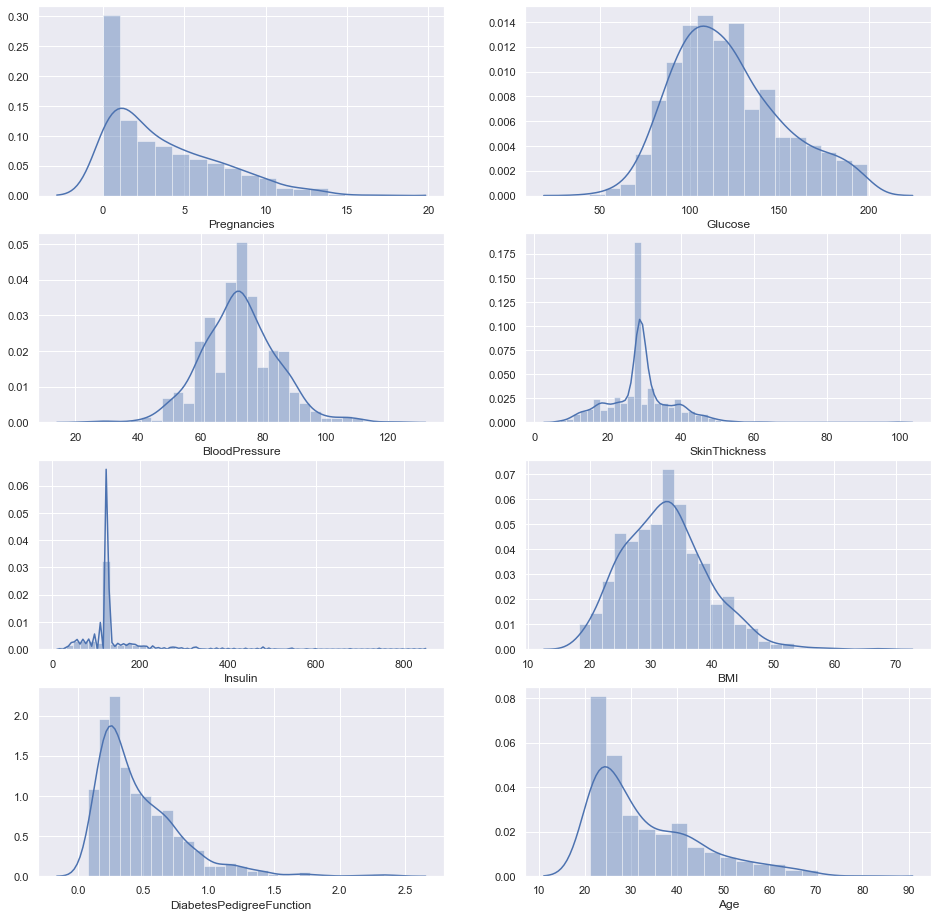

In [14]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Pregnancies'],ax=ax2[0][0])
sns.distplot(diabetes_data['Glucose'],ax=ax2[0][1])
sns.distplot(diabetes_data['BloodPressure'],ax=ax2[1][0])
sns.distplot(diabetes_data['SkinThickness'],ax=ax2[1][1])
sns.distplot(diabetes_data['Insulin'],ax=ax2[2][0])
sns.distplot(diabetes_data['BMI'],ax=ax2[2][1])
sns.distplot(diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(diabetes_data['Age'],ax=ax2[3][1])

The plots show that (Glucose, Blood_pressure , BMI,SkinThickness) are normally distributed.
whiile (Preganancies, insulin, age, DiabetesPedigreeFunction) are rightly skewed. 

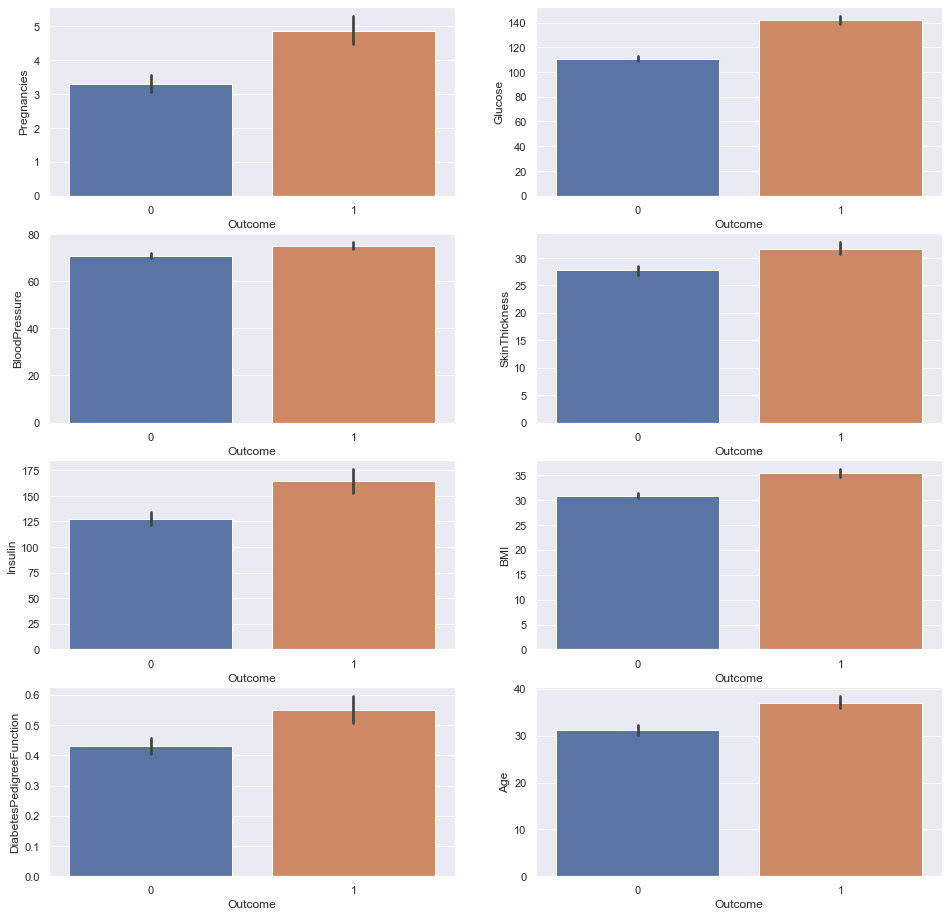

In [15]:
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.barplot(diabetes_data['Outcome'],diabetes_data['Pregnancies'],ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['Glucose'],ax=ax2[0][1])
sns.barplot(diabetes_data['Outcome'],diabetes_data['BloodPressure'],ax=ax2[1][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['SkinThickness'],ax=ax2[1][1])
sns.barplot(diabetes_data['Outcome'],diabetes_data['Insulin'],ax=ax2[2][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['BMI'],ax=ax2[2][1])
sns.barplot(diabetes_data['Outcome'],diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['Age'],ax=ax2[3][1])


## Checking relation between features and checking for multicollinearity

In [16]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


we can see observe some relatioin such as:
Bloodpressure is depdendent on Age variable(0.324915) , Similarly, Glocose level and Skin thickness depends on age 
we can also see significant relation between pregnancies and age (0.544341) but we have not considered it as case of multicollinearity because according to rule of thumb collinearity is expected for value > (0.70 or 0.80).

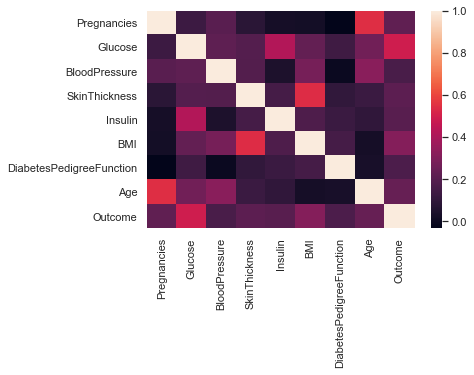

In [17]:
corr=diabetes_data.corr()
sns.heatmap(corr)

In [18]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

order of dependencies of independent features on dependent_feature

## Scaling the data

we use StandardScaler
AS there are many different parameters with different units of their measurements (eg cost,weight ) so we need to scale down each feature into single unit of variance
StandardScaler is useful for the features that follow a Normal distribution.

In StandardScaler mean=0 and variance =1. This operation is performed feature-wise in an independent way.

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X =  pd.DataFrame(ss.fit_transform(diabetes_data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [21]:
x=X
y=diabetes_data['Outcome']

## Test Train Split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=.3,random_state=3,stratify=y)

Using Logistic regression algorithm

In [30]:
from sklearn.linear_model import LogisticRegression
LR_classifier=LogisticRegression(C=1,penalty='l2')
LR_classifier.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score,confusion_matrix

print("Train Set Accuracy:"+str(accuracy_score(Y_train,LR_classifier.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,LR_classifier.predict(X_test))*100))

Train Set Accuracy:76.53631284916202
Test Set Accuracy:76.19047619047619


Using KNeighboursClassifier algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:80.26070763500931
Test Set Accuracy:74.89177489177489


In [32]:
import pickle
pickle_out = open("LR_classifier.pkl","wb")
pickle.dump(LR_classifier, pickle_out)
pickle_out.close()